In [1]:
#Restart abd update server: wandb server start --upgrade
#API key can be found at: http://localhost:8080/authorize

import wandb
import torch
import math
from cplAE_MET.utils.load_config import load_config
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
paths = load_config('config.toml')
wandb.init(project="tutorials",
           dir='../',
           group='simple',
           entity="rhngla")
config = {"learning_rate": 0.001, "epochs": 100, "batch_size": 128}
wandb.config = config

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: rhngla. Use `wandb login --relogin` to force relogin


In [3]:
class DynamicNet(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate five parameters and assign them as members.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        y = self.a + self.b * x + self.c * x ** 2 - self.d * x ** 3
        return y

# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = DynamicNet()

# Optional
wandb.watch(model, log_freq=1, log='all')

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)
for t in range(100):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    print(t, loss.item())
    wandb.log({"loss": loss})

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 534820.9375
1 529629.875
2 519873.84375
3 506202.0625
4 489264.03125
5 469691.8125
6 448086.03125
7 425006.125
8 400962.96875
9 376414.9375
10 351765.34375
11 327362.6875
12 303501.25
13 280423.65625
14 258323.953125
15 237351.34375
16 217614.09375
17 199184.109375
18 182101.125
19 166377.15625
20 152000.640625
21 138940.46875
22 127149.6640625
23 116568.796875
24 107129.0859375
25 98755.203125
26 91367.578125
27 84884.625
28 79224.4453125
29 74306.296875
30 70051.90625
31 66386.25
32 63238.4453125
33 60542.2109375
34 58236.203125
35 56264.23046875
36 54575.29296875
37 53123.578125
38 51868.3203125
39 50773.55859375
40 49807.9453125
41 48944.390625
42 48159.78515625
43 47434.625
44 46752.71484375
45 46100.78125
46 45468.1875
47 44846.5625
48 44229.52734375
49 43612.41015625
50 42991.96875
51 42366.17578125
52 41733.98046875
53 41095.11328125
54 40449.94140625
55 39799.296875
56 39144.3359375
57 38486.46484375
58 37827.21484375
59 37168.19921875
60 36511.015625
61 35857.20703125
62 35

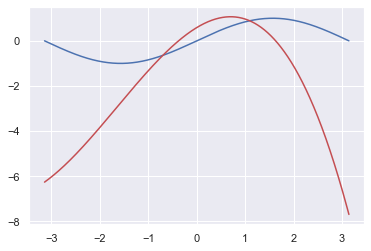

In [4]:
plt.plot(x.numpy(),y.numpy(), 'b')
plt.plot(x.numpy(),model(x).detach().numpy(), 'r')
plt.show()